# Introduction

> This file contains Microsoft stock market information from 04/01/2015 through 04/01/2021. It was acquired in Google Sheets using the command 'GOOGLEFINANCE'
> the files have the following columns:
> Date - in format: yy-mm-dd
> 
> Open - price of the stock at market open 
> 
> High - Highest price reached in the day
> 
> Low Close - Lowest price reached in the day
> 
> Volume - Number of shares traded
> 


# Table of content


* Data Preprocessing
* Data Visualization
* STATIONARITY
* Trend
* Smoothing
* Seasonality (along with Trend):Differencing
* Modelling:
* ACF
* PACF
* ARIMA
* SARIMA
* Forecast
* Model Development
* Train-Test-Split
* MLP
* Evaluation : RMSE
* Conclusion



# Data Preprocessing

In [191]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import itertools
import warnings
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import statsmodels.formula.api as smf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [106]:
data=pd.read_csv("Microsoft_Stock.csv")

In [107]:
data

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


> Since we are working with time series, the most essential features are the time related feature. So , we will convert dataime to index In this example, we have the column DateTime which uniquely identifies a day and Time  .This column is provided in string format. So we will convert it to the datetime64[ns] data type.

In [109]:
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'])

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [111]:
data.shape

(1511, 6)

In [112]:
data.set_index("Date",inplace=True)

In [113]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455


In [10]:
data.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
data.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


# Data Visualization

  Let's draw a chart showing how volume , high and low prices hanges over time .

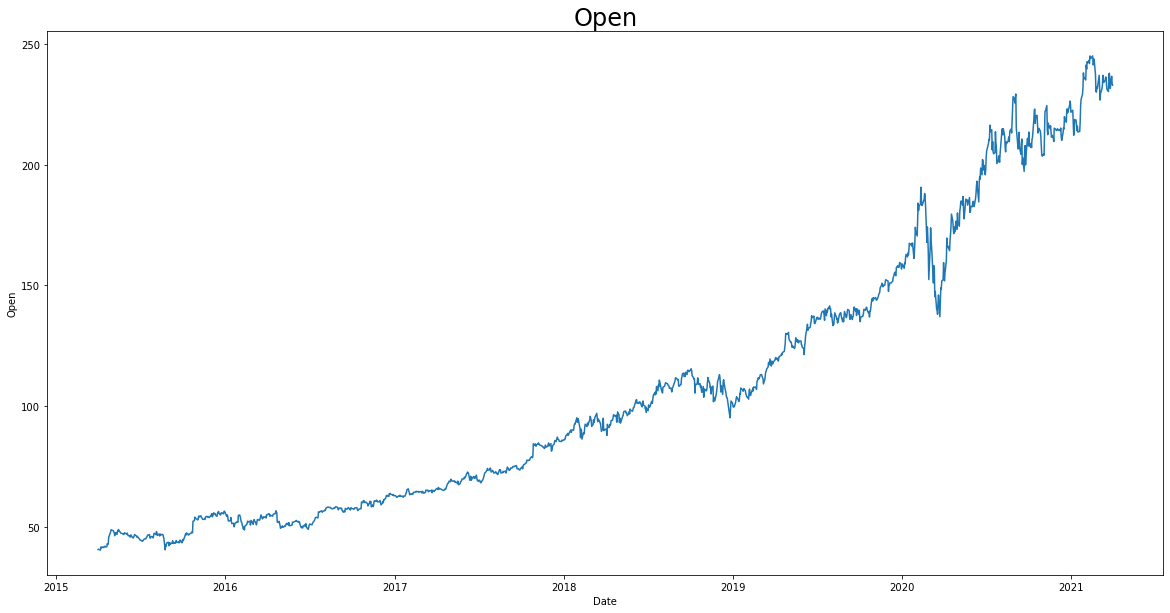

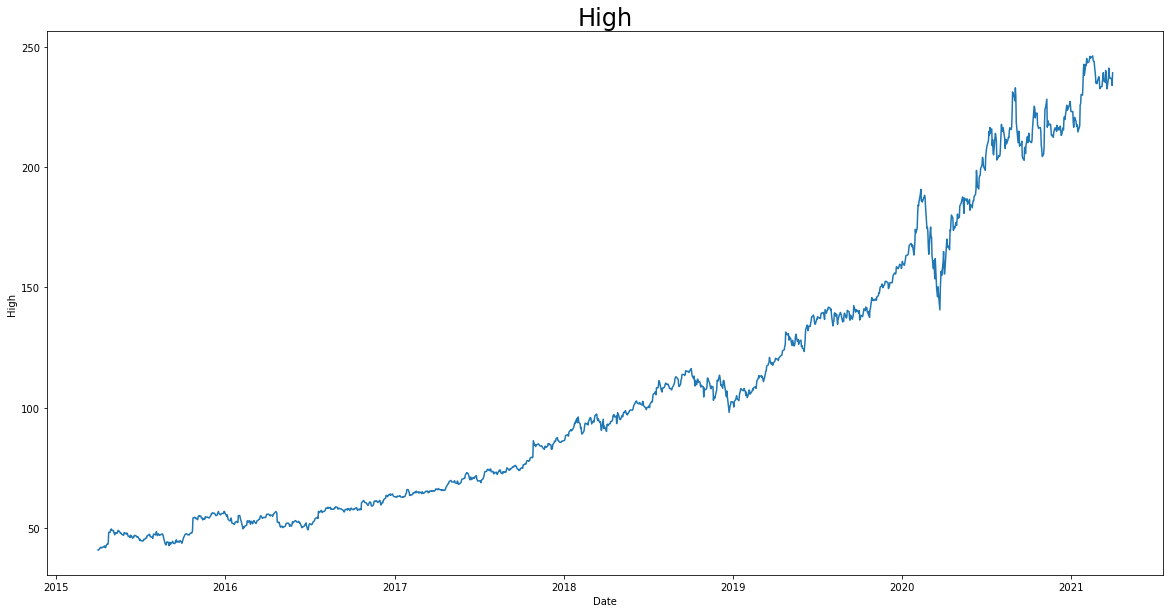

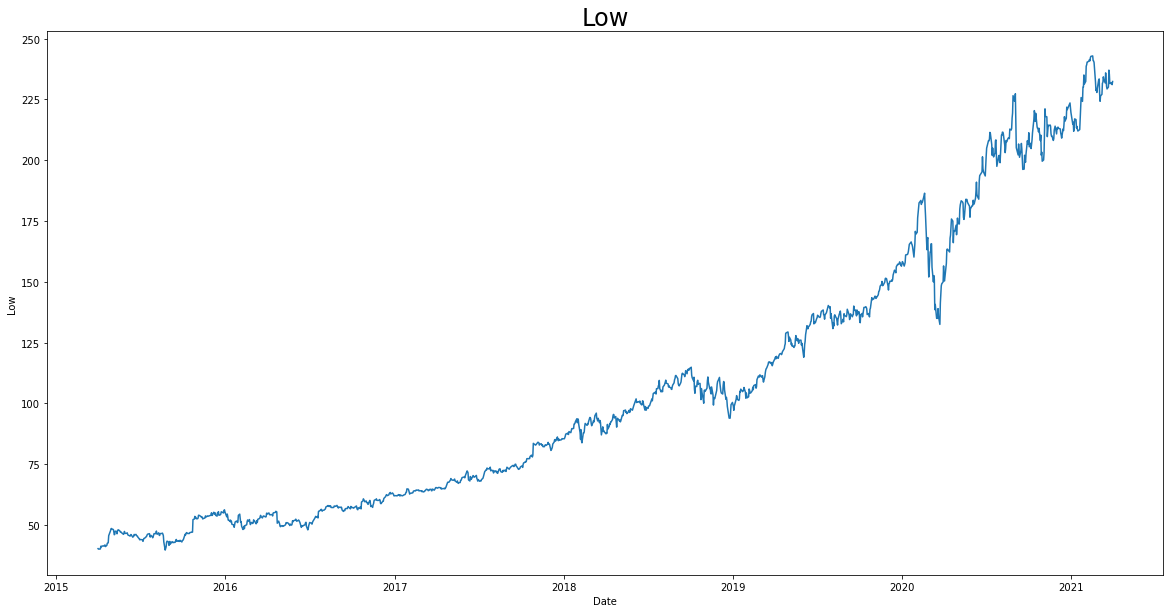

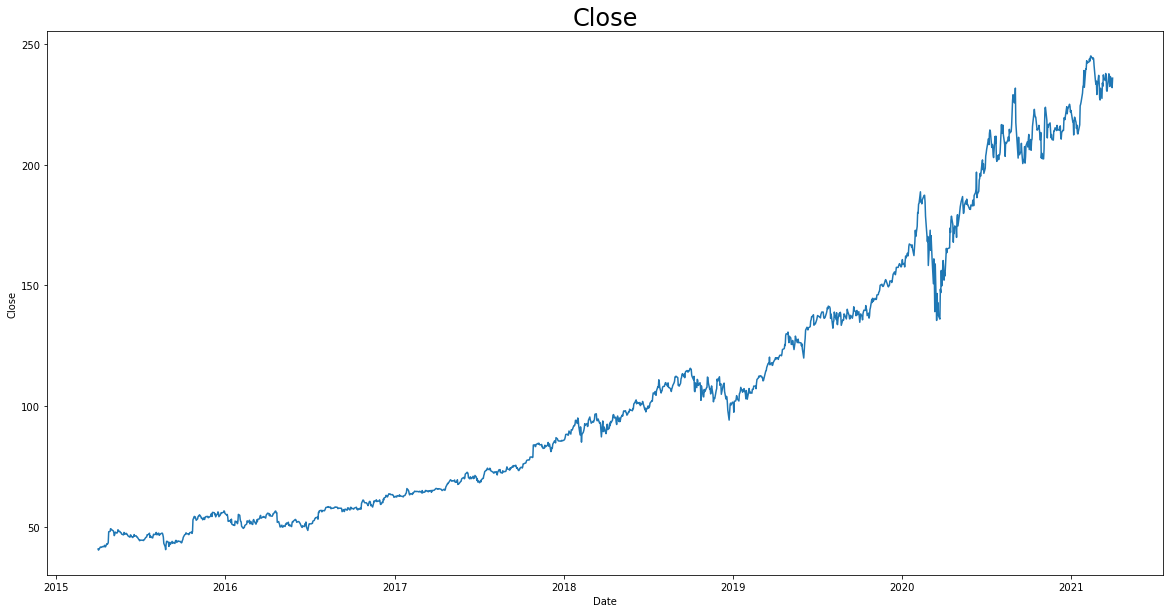

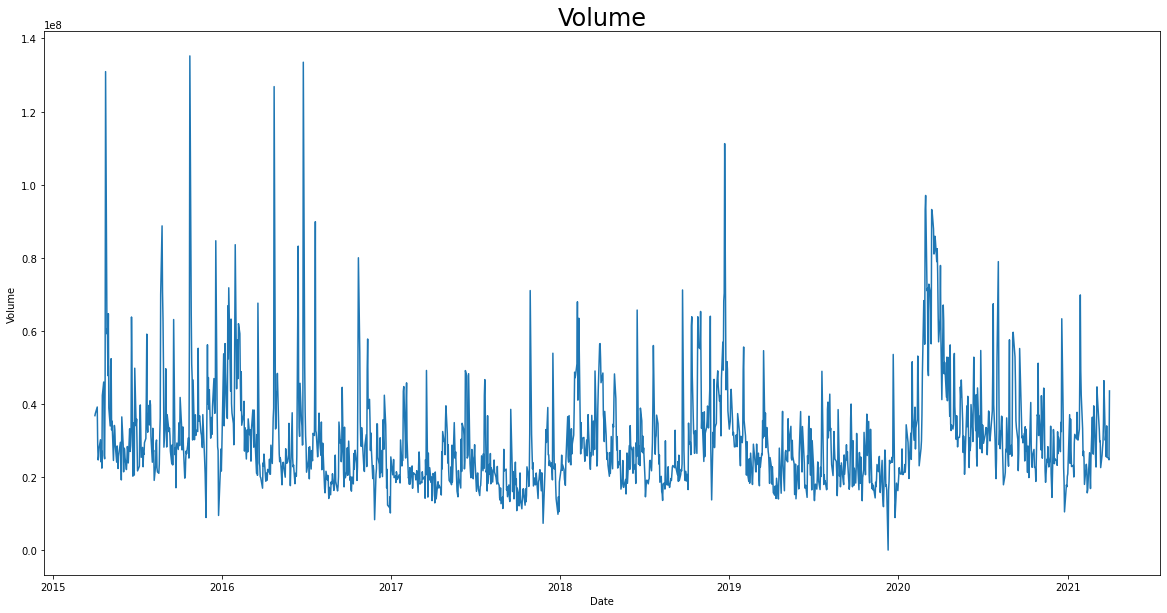

In [12]:
for col in data.columns:
    plt.figure(figsize=(20,10))
    sns.lineplot(x = data.index ,y = data[col],data = data)
    plt.title(col , fontsize=24)
    plt.show()

**It’s clear from the plots that there is an overall increase in the trend,with some seasonality in Volume plot**

# STATIONARITY

In [114]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window = 10).mean()
    MSTD = timeseries.rolling(window = 10).std()

    #Plot rolling statistics:
    plt.figure(figsize=(20,10))
    orig = plt.plot(timeseries, color='pink',label='Original')
    mean = plt.plot(MA, color='b', label='Rolling Mean')
    std = plt.plot(MSTD, color='g', label = 'Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend(loc='best')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfout = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfout['Critical Value (%s)'%key] = value
    print(dfout)

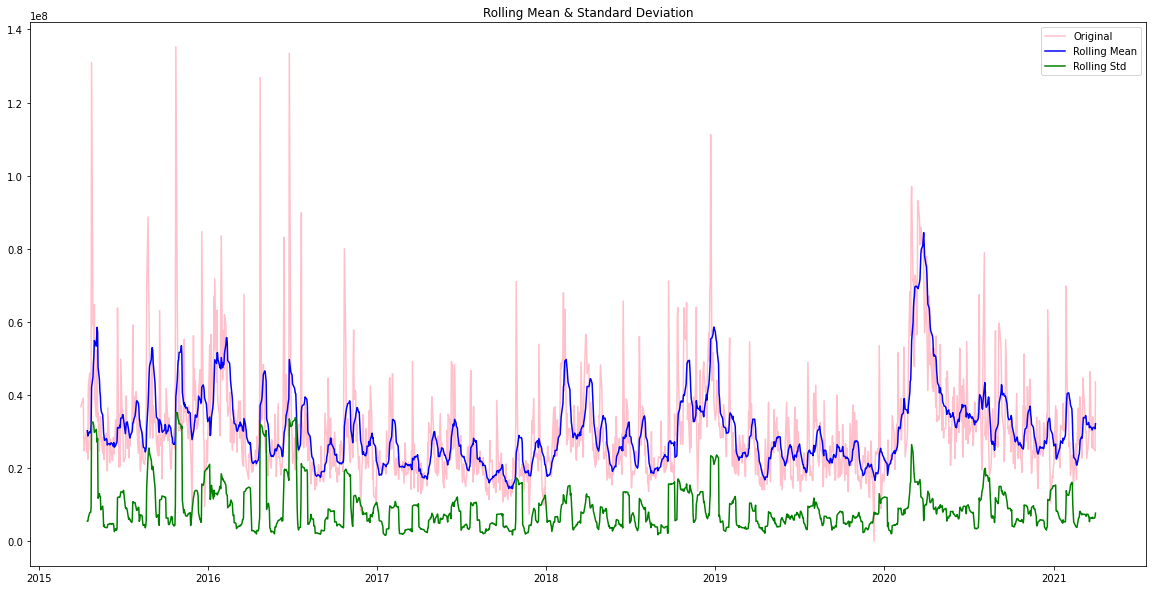

Results of Dickey-Fuller Test:
Test Statistic                -6.899656e+00
p-value                        1.291812e-09
#Lags Used                     8.000000e+00
Number of Observations Used    1.502000e+03
Critical Value (1%)           -3.434711e+00
Critical Value (5%)           -2.863466e+00
Critical Value (10%)          -2.567795e+00
dtype: float64


In [115]:
test_stationarity(data['Volume'])

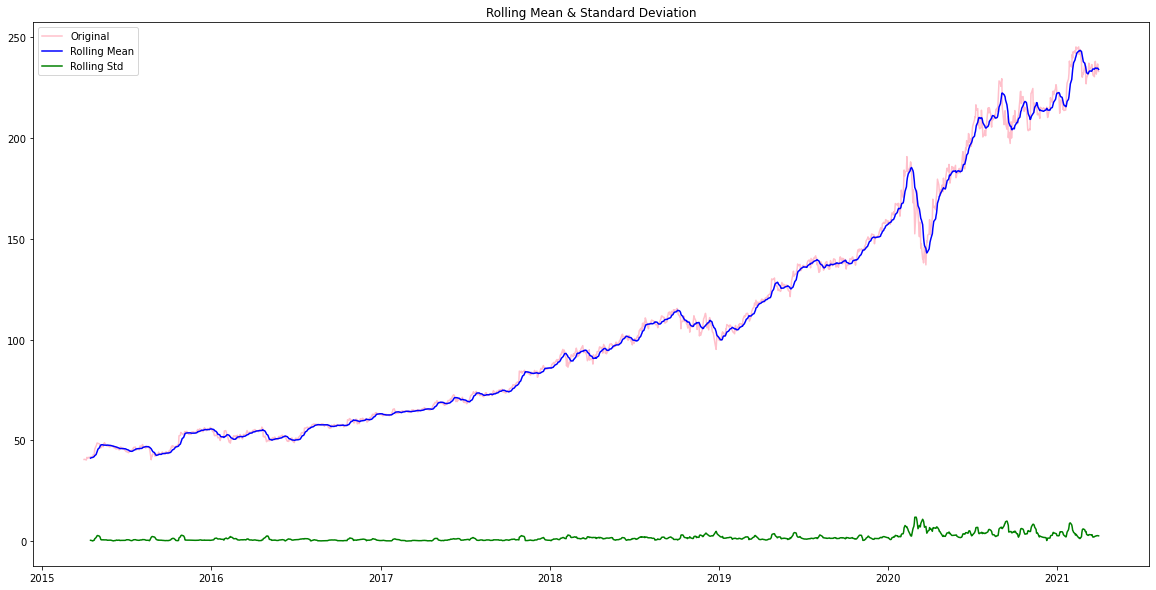

Results of Dickey-Fuller Test:
Test Statistic                    0.823915
p-value                           0.992013
#Lags Used                        2.000000
Number of Observations Used    1508.000000
Critical Value (1%)              -3.434694
Critical Value (5%)              -2.863459
Critical Value (10%)             -2.567791
dtype: float64


In [116]:
test_stationarity(data['Open'])

> It will be the same plot for the 'High', 'Low' and 'Close' since they have the same shape

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.8 KB


> This is not stationary because :
> 
> • mean is increasing even though the std is small.
> 
> • Test stat is > critical value.
> 
> • Note: the signed values are compared and the absolute values.

# Transformation

There are two major factors that make a time series non-stationary. They are:

• Trend: non-constant mean

• Seasonality: Variation at specific time-frames

# Trend
> 
> The first step is to reduce the trend using transformation, as we can see here that there is a strong positive trend. These transformation can be log, sq-rt, cube root etc . Basically it penalizes larger values more than the smaller. In this case we will use the logarithmic transformation.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 103.1 KB


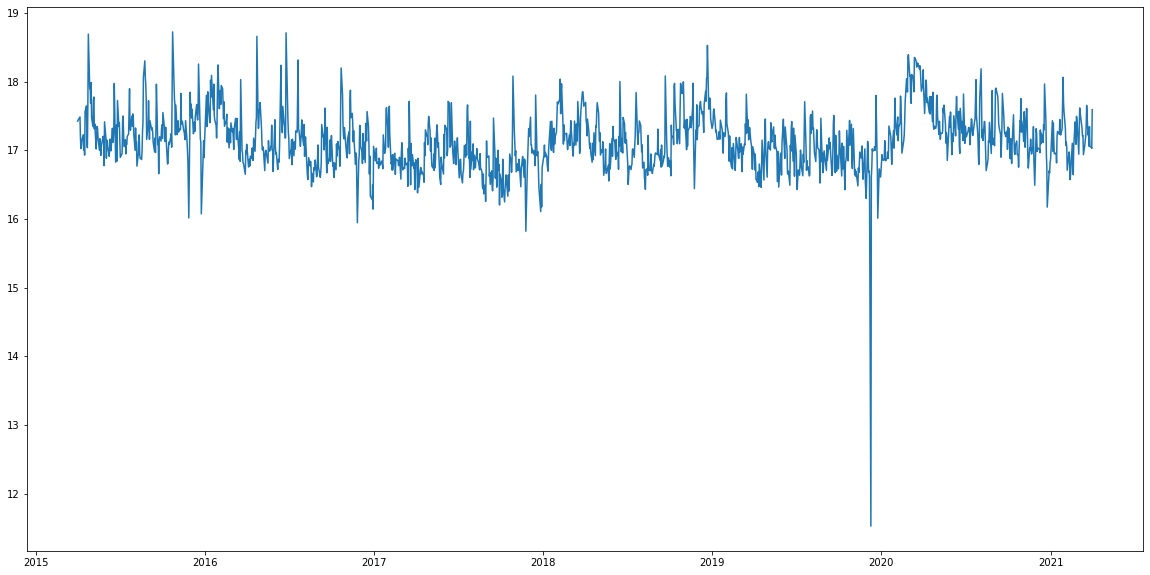

In [18]:
plt.figure(figsize=(20,10))
ts_log=np.log(data['Volume'])
plt.plot(ts_log)

> There is some noise in realizing the forward trend here. So we will try Smoothing in order to remove the noise.

# Smoothing

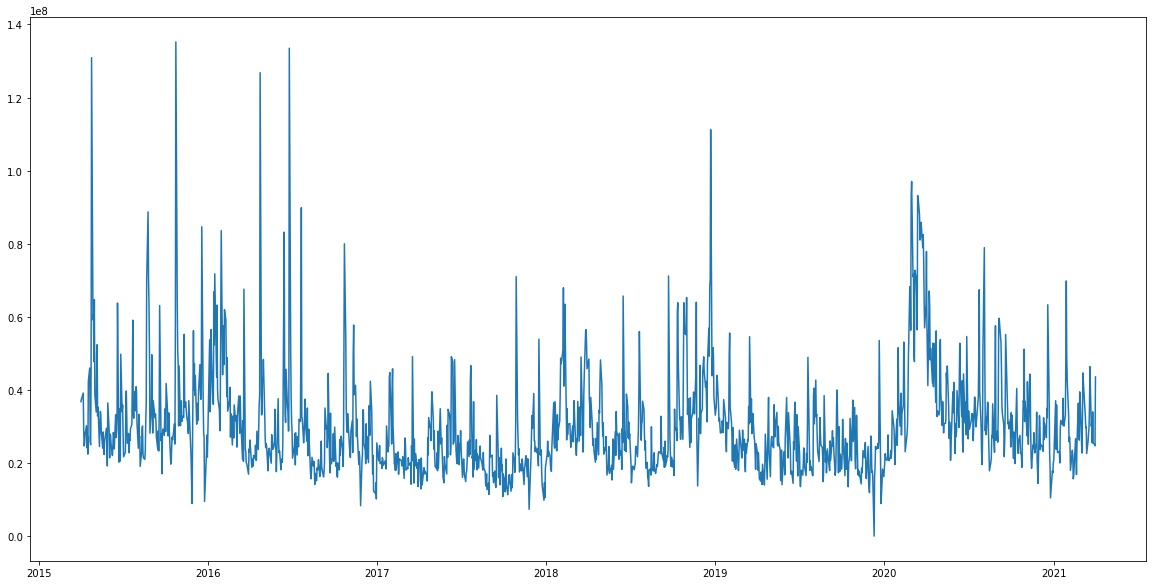

In [19]:
plt.figure( figsize=(20,10) )
plt.plot(data['Volume'])

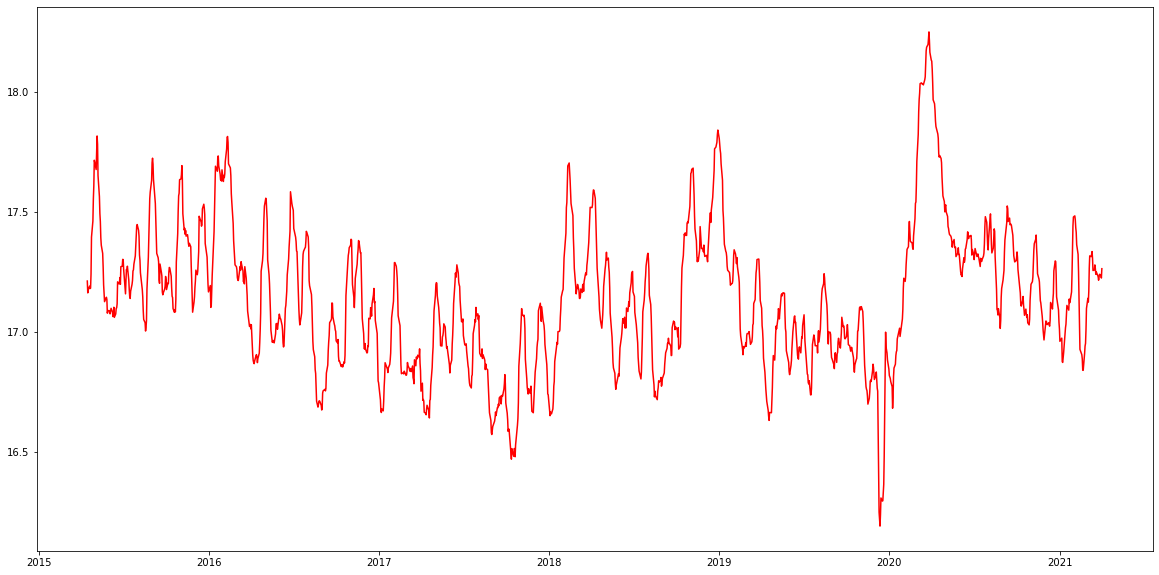

In [20]:
plt.figure(figsize=(20,10))
moving_averge=ts_log.rolling(window = 10).mean()
plt.plot(moving_averge , color='red')

Now we will subtract the rolling mean from the original series.

In [118]:
moving_avg_diff= ts_log-moving_averge
moving_avg_diff

Date
2015-04-01 16:00:00         NaN
2015-04-02 16:00:00         NaN
2015-04-06 16:00:00         NaN
2015-04-07 16:00:00         NaN
2015-04-08 16:00:00         NaN
                         ...   
2021-03-25 16:00:00    0.115931
2021-03-26 16:00:00   -0.186116
2021-03-29 16:00:00   -0.192891
2021-03-30 16:00:00   -0.197805
2021-03-31 16:00:00    0.328359
Name: Volume, Length: 1511, dtype: float64

In [119]:
moving_avg_diff.dropna(inplace=True)
moving_avg_diff

Date
2015-04-15 16:00:00   -0.087286
2015-04-16 16:00:00   -0.232491
2015-04-17 16:00:00    0.388136
2015-04-20 16:00:00    0.455114
2015-04-21 16:00:00   -0.105945
                         ...   
2021-03-25 16:00:00    0.115931
2021-03-26 16:00:00   -0.186116
2021-03-29 16:00:00   -0.192891
2021-03-30 16:00:00   -0.197805
2021-03-31 16:00:00    0.328359
Name: Volume, Length: 1502, dtype: float64

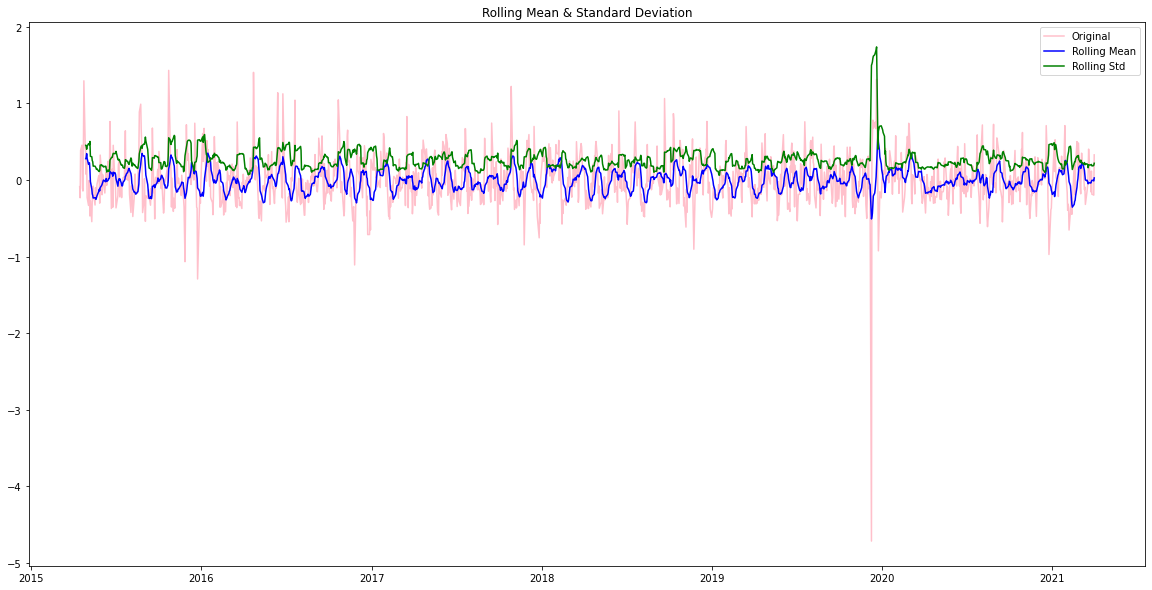

Results of Dickey-Fuller Test:
Test Statistic                -1.222250e+01
p-value                        1.099157e-22
#Lags Used                     2.000000e+01
Number of Observations Used    1.481000e+03
Critical Value (1%)           -3.434773e+00
Critical Value (5%)           -2.863494e+00
Critical Value (10%)          -2.567810e+00
dtype: float64


In [120]:
test_stationarity(moving_avg_diff)

# Seasonality (along with Trend)

Previously we saw just trend part of the time series, now we will see both trend and seasonality. And to do so, there are two common methods to remove trend and seasonality, they are:

• Differencing: by taking difference using time lag

• Decomposition: model both trend and seasonality, then remove them



**Differencing:**

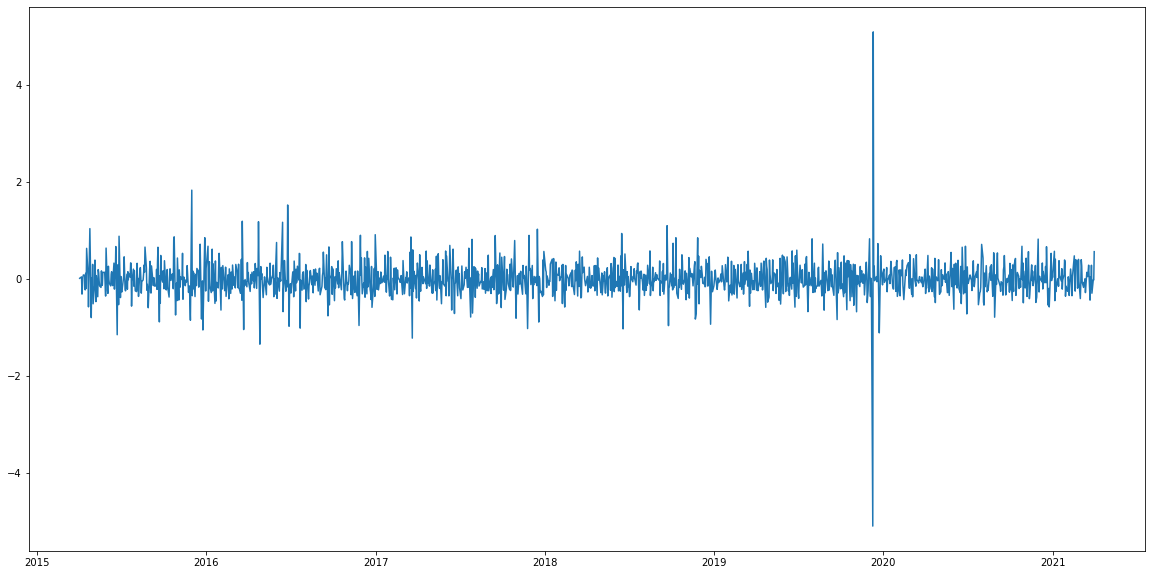

In [121]:
plt.figure(figsize=(20,10))
ts_log_diff=ts_log-ts_log.shift()
plt.plot(ts_log_diff)

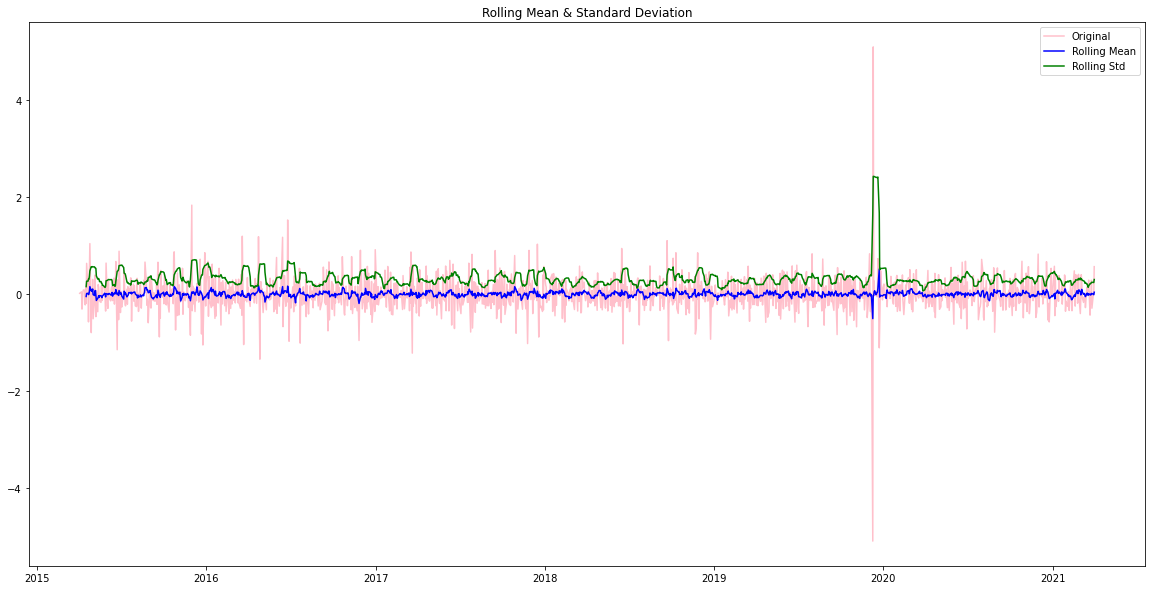

Results of Dickey-Fuller Test:
Test Statistic                -1.277553e+01
p-value                        7.608278e-24
#Lags Used                     2.400000e+01
Number of Observations Used    1.485000e+03
Critical Value (1%)           -3.434761e+00
Critical Value (5%)           -2.863488e+00
Critical Value (10%)          -2.567807e+00
dtype: float64


In [122]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# Modelling

> Now let’s check out on how we can figure out what value of p and q to use. We will be using these two popular plotting techniques :
> 
> • **Autocorrelation Function (ACF)**: It just measures the correlation between two consecutive (lagged version). example at lag 4, ACF will compare series at time instance t1…t2 with series at instance t1–4…t2–4
> 
> • **Partial Autocorrelation Function (PACF)**: is used to measure the degree of association between y(t) and y(t-p).

# ACF

**Autocorrelation Function (ACF)**

> While using the autocorrelation function (ACF), we aim to identify which lags have significant correlations, understand the patterns and properties of the time series, and then use that information to model the time series data. From the ACF, we can assess the randomness and stationarity of a time series. We can also determine whether trends and seasonal patterns are present.
> 
> In an ACF plot, each bar represents the size and direction of the correlation. Bars that extend across the red line are statistically significant.

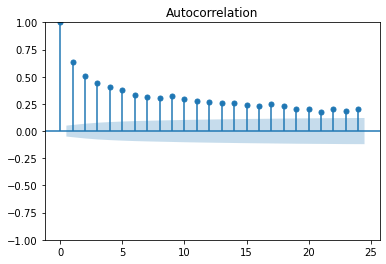

<Figure size 1440x720 with 0 Axes>

In [123]:
from statsmodels.graphics import tsaplots
# Display the autocorrelation plot of your time series
tsaplots.plot_acf(data['Volume'], lags=24 )
plt.figure(figsize=(20,10))
plt.show()

# PACF

**Partial Autocorrelation Function (PACF)**

> The partial autocorrelation function is similar to the ACF except that it displays only the correlation between two observations that the shorter lags between those observations do not explain. For example, the partial autocorrelation for lag 3 is only the correlation that lags 1 and 2 do not explain. In other words, the partial correlation for each lag is the unique correlation between those two observations after partialling out the intervening correlations.

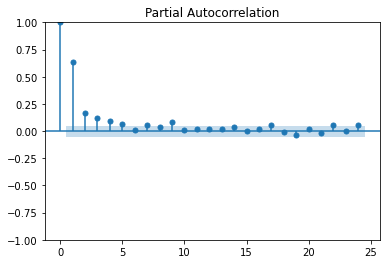

<Figure size 1440x720 with 0 Axes>

In [124]:
tsaplots.plot_pacf(data['Volume'], lags=24 )
plt.figure(figsize=(20,10))
plt.show()

# ARIMA

> Auto Regressive Integrated Moving Average(ARIMA) — It is like a liner regression equation where the predictors depend on parameters (p,d,q) of the ARIMA model .
> 
> In other words, to be precise:
> 
> • p : This is the number of AR (Auto-Regressive) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).
> 
> • q : This is the number of MA (Moving-Average) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).
> 
> • d :This is the number of differences or the number of non-seasonal differences .

                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 1511
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -26585.774
Date:                Mon, 08 May 2023   AIC                          53179.547
Time:                        19:23:38   BIC                          53200.827
Sample:                             0   HQIC                         53187.472
                               - 1511                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6208      0.060     10.362      0.000       0.503       0.738
ma.L1         -1.1367      0.065    -17.361      0.000      -1.265      -1.008
ma.L2          0.1874      0.055      3.384      0.0

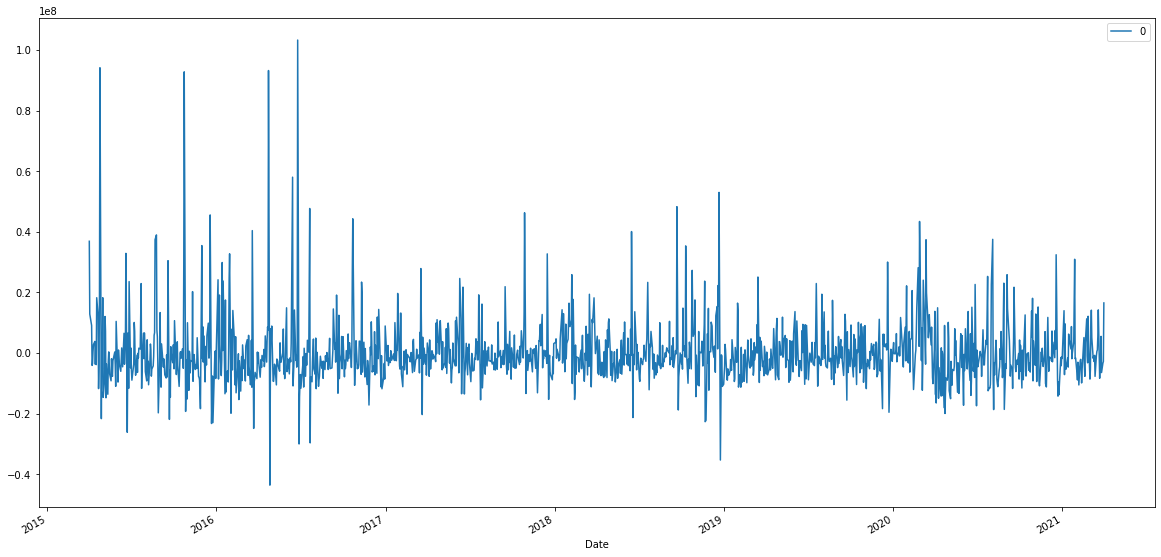

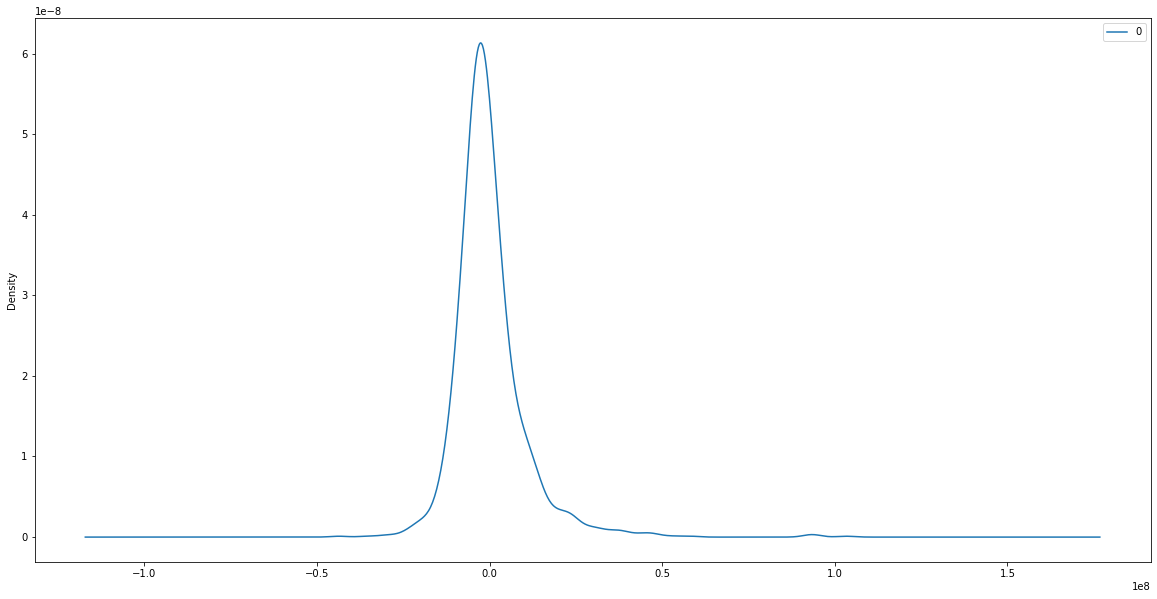

                  0
count  1.511000e+03
mean   5.605306e+04
std    1.075570e+07
min   -4.362672e+07
25%   -5.315694e+06
50%   -1.731173e+06
75%    3.282732e+06
max    1.032959e+08


In [125]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Volume'],order = (1,1,2))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(20,10))
plt.show()
residuals.plot(kind='kde',figsize=(20,10))
plt.show()
print (residuals.describe())

# SARIMAX MODEL

When looking to fit time series data with a **seasonal** ARIMA model, our first goal is to find the values of ARIMA(p,d,q)(P,D,Q)s that optimize a metric of interest. We could use the above described procedere or resolve this issue by writing Python code to programmatically select the optimal parameter values for our ARIMA(p,d,q)(P,D,Q)s time series model.

### Grid search

>We will use a "grid search" to iteratively explore different combinations of parameters. For each combination of parameters, we fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess its overall quality. 
>
>Once we have explored the entire landscape of parameters, our optimal set of parameters will be the one that yields the best performance for our criteria of interest. Let's begin by generating the various combination of parameters that we wish to assess.

In [126]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Volume'], order=(1,1,2))
results = model.fit()


In [127]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 1511
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -26585.774
Date:                Mon, 08 May 2023   AIC                          53179.547
Time:                        19:23:42   BIC                          53200.827
Sample:                             0   HQIC                         53187.472
                               - 1511                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6208      0.060     10.362      0.000       0.503       0.738
ma.L1         -1.1367      0.065    -17.361      0.000      -1.265      -1.008
ma.L2          0.1874      0.055      3.384      0.0

In [128]:
# Define the p, d and q parameters 
# In our example, we only take values between 0 and 2 to make the computation faster
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


We can now use the triplets of parameters defined above to automate the process of training and evaluating ARIMA models on different combinations. In statistics and machine learning, this process is known as **grid search** (or hyperparameter optimization) for model selection.

When evaluating and comparing statistical models fitted with different parameters, each can be ranked against one another based on how well it fits the data or its ability to accurately predict future data points. We will use the **AIC** (Akaike Information Criterion) value, which is conveniently returned with ARIMA models fitted using statsmodels. 

The **AIC** measures how well a model fits the data while taking into account the overall complexity of the model. A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value.

The code chunk below iterates through combinations of parameters and uses the SARIMAX function from statsmodels to fit the corresponding Seasonal ARIMA model. Here, the order argument specifies the (p, d, q) parameters, while the seasonal_order argument specifies the (P, D, Q, S) seasonal component of the Seasonal ARIMA model. After fitting each SARIMAX()model, the code prints out its respective AIC score.

In [65]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(data['Volume'],
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            model_fit = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, model_fit.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:56604.844877696465
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:55442.6176994432
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:54190.791643613884
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:53131.71660290864
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:54124.15509779626
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:53682.73266177066
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:53387.39034724812
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:53117.414561097394
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:55668.58851795868
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:55038.61833589795
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:53831.84857191633
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:52849.73657208965
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:54938.64552452628
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:54787.23461916897
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:53112.09325545239
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:52848.93430552816
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:53522.129783009776
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:53105.75306278109
ARIMA(0

In [66]:
results.aic

53179.54714131127

Because some parameter combinations may lead to numerical misspecifications, we explicitly disabled warning messages in order to avoid an overload of warning messages. These misspecifications can also lead to errors and throw an exception, so we make sure to catch these exceptions and ignore the parameter combinations that cause these issues.

The output of our code suggests that SARIMAX(1, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value. We should therefore consider this to be optimal option out of all the models we have considered.

### Fitting the SARIMAX-Model

Using grid search, we have identified the set of parameters that produces the best fitting model to our time series data. We can proceed to analyze this particular model in more depth.

We'll start by plugging the optimal parameter values into a new SARIMAX model:

In [129]:
mod = SARIMAX(data['Volume'],
              order=(1, 1, 1),
              seasonal_order=(1, 1, 1, 12),
              enforce_stationarity=False,
              enforce_invertibility=False)

model_fit = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6208      0.060     10.362      0.000       0.503       0.738
ma.L1         -1.1367      0.065    -17.361      0.000      -1.265      -1.008
ma.L2          0.1874      0.055      3.384      0.001       0.079       0.296
sigma2      1.207e+14        nan        nan        nan         nan         nan


The summary attribute that results from the output of SARIMAX returns a significant amount of information, but we'll focus our attention on the table of coefficients. The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. 

When fitting seasonal ARIMA models (and any other models for that matter), it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

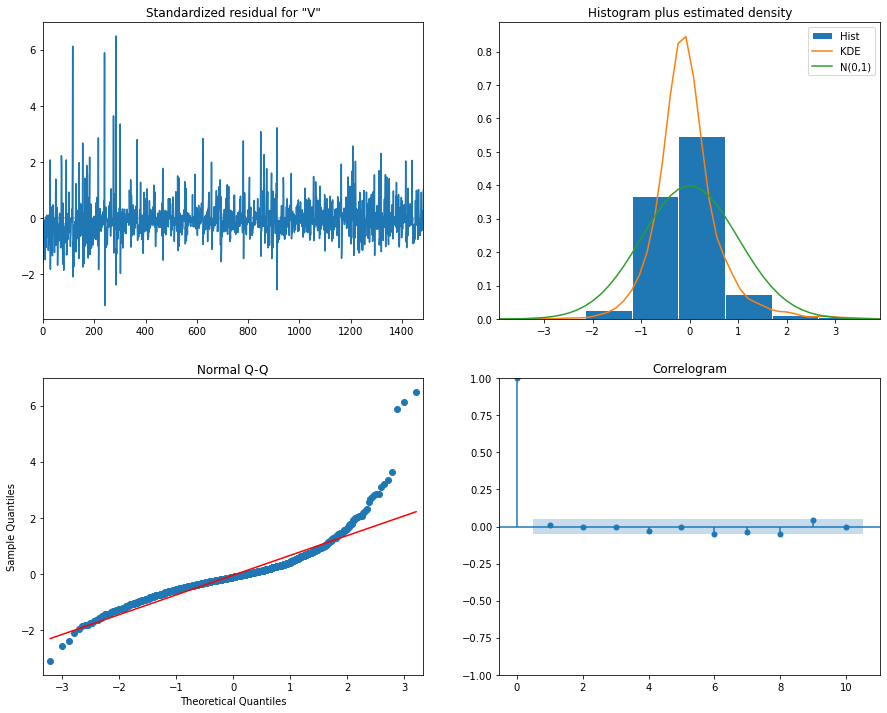

In [68]:
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

> * Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved (which is the case in our example).
>
> * Our model diagnostics suggests that the model residuals are almost normally distributed based on the following:
>
> * In the top right plot, we see that the red KDE line almost follows with the N(0,1) line (where N(0,1))is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is an indication that the residuals are normally distributed.
>
> * The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) do not optimally follow the linear trend of the samples taken from a standard normal distribution with N(0, 1). This is an indication that the residuals are almost normally distributed.
>
> * However, the residuals over time (top left plot) display an obvious pappern and don't appear to be white noise. 
>
> * The autocorrelation (i.e. correlogram) plot on the bottom right shows that the time series residuals have very low correlation with lagged versions of itself.
>
> * Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.
>
> * Although we have a satisfactory fit, some parameters of our seasonal ARIMA model could be changed to improve our model fit. For example, our grid search only considered a restricted set of parameter combinations, so we may find better models if we widened the grid search.

##  Forecasts

We have obtained a model for our time series that can now be used to produce forecasts. We start by comparing predicted values to real values of the time series, which will help us understand the accuracy of our forecasts. The get_prediction() and conf_int() attributes allow us to obtain the values and associated confidence intervals for forecasts of the time series.

In [130]:
pred = model_fit.get_prediction(start=('2019-04-01'), dynamic=False)
pred_ci = pred.conf_int()

The code above requires the forecasts to start at April 2018.

The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.

We can plot the real and forecasted values of the energy production time series to assess how well we did. Notice how we zoomed in on the end of the time series by slicing the date index.

But before so, we will extract the column 'Volume' as a single dataset

In [101]:
data_v = pd.DataFrame(data['Volume'])


In [102]:
data_v

,Volume
Date,
2015-04-01 16:00:00,36865322
2015-04-02 16:00:00,37487476
2015-04-06 16:00:00,39223692
2015-04-07 16:00:00,28809375
2015-04-08 16:00:00,24753438
...,...
2021-03-25 16:00:00,34061853
2021-03-26 16:00:00,25479853
2021-03-29 16:00:00,25227455


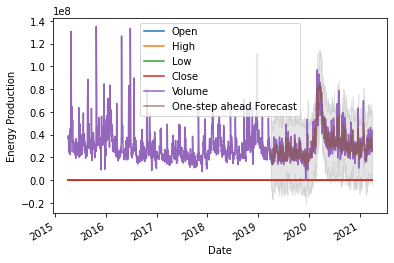

In [132]:
ax = data['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)


ax.set_xlabel('Date')
ax.set_ylabel('Energy Production')
plt.legend()

plt.show()

> * Overall, our forecasts align with the true values relatively well.

It is also useful to quantify the accuracy of our forecasts. We will use the MSE (Mean Squared Error), which summarizes the average error of our forecasts. For each predicted value, we compute its distance to the true value and square the result. The results need to be squared so that positive/negative differences do not cancel each other out when we compute the overall mean.

Before we jump to MSE, we have to split our dataset and train our model to get better results

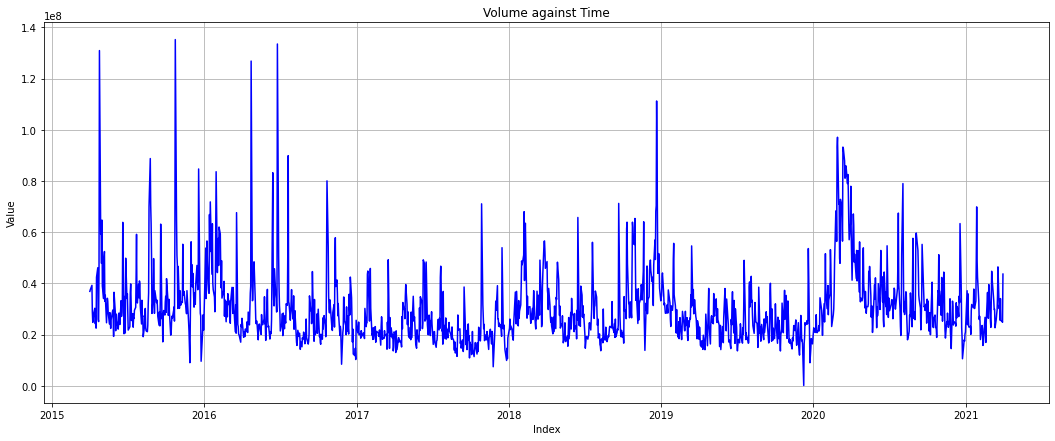

In [136]:
# plot time plot 
fig, ax = plt.subplots()
fig.set_size_inches(18, 7)
ax.set_title("Volume against Time")
ax.grid()
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.plot(
    data['Volume'],
    color='blue', label='Data');

In [193]:
# split dataset
df_train, df_test = train_test_split(data, train_size=0.7, shuffle=False)

# display training dataset length
print(f"The length of training dataset is: {len(df_train)}")

# display test dataset length
print(f"The length of test dataset is: {len(df_test)}")

The length of training dataset is: 1057
The length of test dataset is: 454


> Let's see what are the portion of dataset which is splitted as training dataset and test dataset.

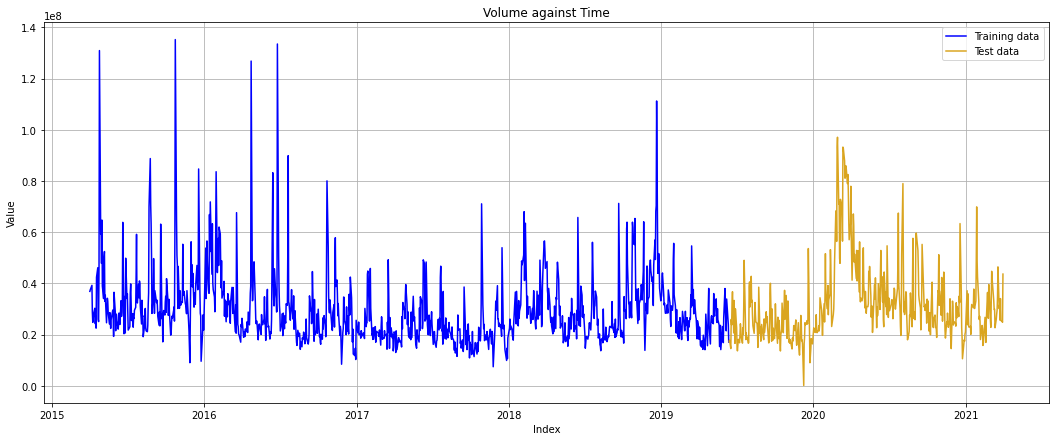

In [194]:
# plot time plot for training and test dataset 
fig, ax = plt.subplots()
fig.set_size_inches(18, 7)
ax.set_title("Volume against Time")
ax.grid()
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.plot(
    df_train['Volume'],
    color='blue', label='Training data');
ax.plot(
    df_test['Volume'],
    color='goldenrod', label='Test data')
ax.legend();

Feature scalinng also help in shortening model training time. Let's do that too.

In [195]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(df_train['Volume'].values.reshape(-1,1))
test_scaled = scaler.transform(df_test['Volume'].values.reshape(-1,1))

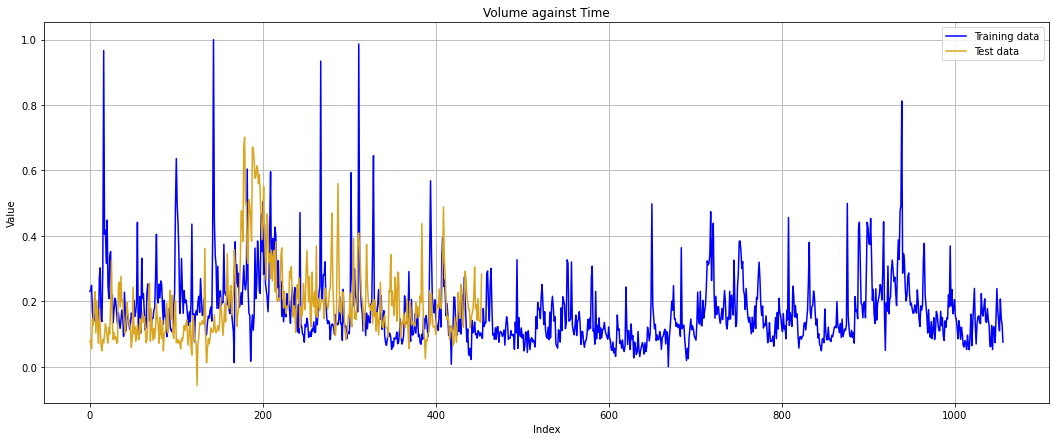

In [196]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 7)
ax.set_title("Volume against Time")
ax.grid()
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.plot(
    train_scaled,
    color='blue', label='Training data');
ax.plot(
    test_scaled,
    color='goldenrod', label='Test data')
ax.legend();

## Model Development

The `torch` library provides a number of API to easily construct a MLP model for the tasks at hand. But first, we will need to prepare the dataset into a format ingestible by the model first. We will first transform the time series data into feature of label, where the feature would be a sequence of *n* length of data and label would be lead-1 of the last data in the feature.

In [197]:
# function should return features in sequence and labels
def sequencing_data(data, sequence_length):
    """
    Helper function to sample sub-sequence of training data.
    Input data must be in np.ndarray.
    """
    x, y = [], []

    for i in range(data.shape[0] - sequence_length):

        # copy the sequences of data starting at this index
        x.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return x, y

# calling the helper function and store them in variables
X_sequence_train, y_sequence_train = sequencing_data(train_scaled, 3)
X_sequence_test, y_sequence_test = sequencing_data(test_scaled, 3)

# sanity check 
print("Total samples for X train: " + str(len(X_sequence_train)))
print("Total samples for y train: " + str(len(y_sequence_train)))
print("Total samples for X test: " + str(len(X_sequence_test)))
print("Total samples for y test: " + str(len(y_sequence_test)))

Total samples for X train: 1054
Total samples for y train: 1054
Total samples for X test: 451
Total samples for y test: 451


Let's write a custom `Dataset` class to transfrom the data into tuples of `torch.Tensor`. This is necessary if we want to load the data in batches using `DataLoader`.

In [198]:
class VolumeDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.FloatTensor(x)
        self.y = torch.FloatTensor(y)
        
    def __len__(self):
        return self.x.size(0)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [199]:
# declare batch size
batch_size = 4

# convert into Dataset using customized class
train_Dataset = VolumeDataset(X_sequence_train, y_sequence_train)
test_Dataset = VolumeDataset(X_sequence_test, y_sequence_test)

# convert into DataLoader
train_loader = DataLoader(train_Dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_Dataset, batch_size=batch_size, shuffle=False)

# declare a dict object
dataloaders = {'train': train_loader, 'test': test_loader} 

It's about time to declare our MLP model architecture. The following code demonstrates how to build a simple MLP model.

In [200]:
class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.input = nn.Linear(input_size, 64)
        self.linear1 = nn.Linear(64, 16)
        self.output = nn.Linear(16, output_size)
    
    def forward(self, x):
        x = x.view(-1, 1, 3)
        out = F.relu(self.input(x))
        out = F.relu(self.linear1(out))
        out = self.output(out)
        return out

In [201]:
# reproducibility
torch.manual_seed(38)

# setting hyperparameter
input_size = 3
output_size = 1
epochs = 100
learning_rate = 0.001

# instantiate the model
model = MLP(input_size, output_size)

# continue setting hyperparameter
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [202]:
# implement model training and validation loop
loss_score = {'train': [], 'test': []}
for epoch in range(epochs):
#     print(f'Epoch {epoch+1}/{epochs}')
    for phase in ['train', 'test']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        loss_cumsum = 0.0
        total_iterations = 0.0

        for i, (X, y) in enumerate(dataloaders[phase]):
            with torch.set_grad_enabled(phase == 'train'):
                out = model(X)
                loss = criterion(out.squeeze(), y.squeeze())

                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

            loss_cumsum += loss.item() * out.size(0)
            total_iterations += out.size(0)

        epoch_loss = loss_cumsum / total_iterations
        print(f'{phase.upper()} Loss: {epoch_loss}')
        loss_score[phase].append(epoch_loss)


TRAIN Loss: 0.012759118498053598
TEST Loss: 0.006262026111050169
TRAIN Loss: 0.008079846437651672
TEST Loss: 0.00610394568578495
TRAIN Loss: 0.008042392218736198
TEST Loss: 0.006850840153168482
TRAIN Loss: 0.007644340948844982
TEST Loss: 0.00803681015514019
TRAIN Loss: 0.0077328586383621995
TEST Loss: 0.005901840304286775
TRAIN Loss: 0.007651154507258403
TEST Loss: 0.006061746312683229
TRAIN Loss: 0.007595210091996871
TEST Loss: 0.005980858748544838
TRAIN Loss: 0.007767215366354893
TEST Loss: 0.006386379615371187
TRAIN Loss: 0.007621984233916472
TEST Loss: 0.005759246585407437
TRAIN Loss: 0.0077148946632041426
TEST Loss: 0.006029672151194739
TRAIN Loss: 0.007686489014055728
TEST Loss: 0.0058212090827506075
TRAIN Loss: 0.007724487278122275
TEST Loss: 0.006376244025403001
TRAIN Loss: 0.007734128351090697
TEST Loss: 0.00599630518045644
TRAIN Loss: 0.00763931720733176
TEST Loss: 0.005782851424174561
TRAIN Loss: 0.00764177985722917
TEST Loss: 0.006050077529506399
TRAIN Loss: 0.0076794945130

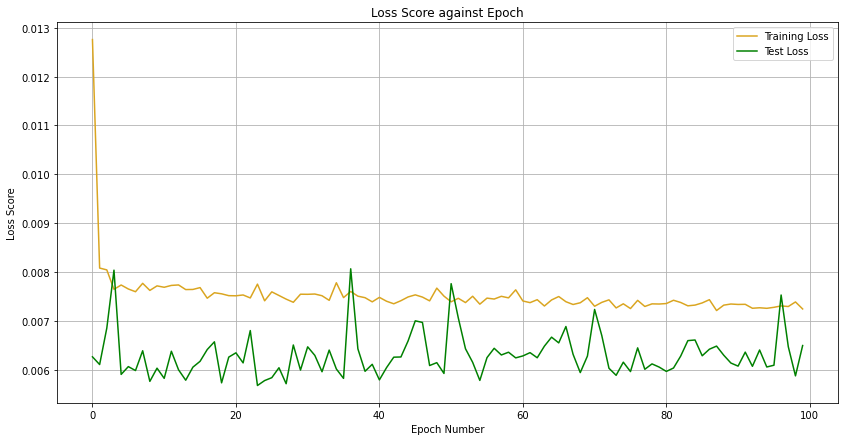

In [203]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
ax.set_title("Loss Score against Epoch")
ax.grid()
ax.set_xlabel("Epoch Number")
ax.set_ylabel("Loss Score")

ax.plot(loss_score['train'], color='goldenrod', label='Training Loss')
ax.plot(loss_score['test'], color='green', label='Test Loss')
ax.legend();

## Evaluation
There are a few metrics that can be used to evaluate the performance of a regression model, which include:
* mean squared error (MSE)
* root mean squared error (RMSE)
* mean absolute error (MAE)

We will examine the performance of the model on test set using RMSE. 

In [205]:
model.eval()

predictions = []
count = 0

# model predictions
with torch.no_grad():
    for i, (X, y) in enumerate(DataLoader(test_Dataset, 1)):
        count += 1
        output = model(X)
        predictions.append(output.item())
        
# convert list into np array and inverse transform it into proper values before feature scaling
predictions = np.array(predictions)
predictions = scaler.inverse_transform(predictions.reshape(1,-1))

# remove beginning 3 rows of data since at least 3 data are needed to make a prediction
df_train, df_test = train_test_split(data, train_size=0.7, shuffle=False)
df_test = df_test.iloc[3:]
df_test['preds'] = predictions.squeeze()

# compute MSE
RMSE = mean_squared_error(df_test.preds, df_test.Volume, squared=False)
print(f"The RMSE for the model is {RMSE}")

The RMSE for the model is 10298051.289099567


Date
2019-06-18 16:00:00    1.743148e+07
2019-06-19 16:00:00    2.111597e+07
2019-06-20 16:00:00    2.395382e+07
2019-06-21 16:00:00    2.930236e+07
2019-06-24 16:00:00    3.297263e+07
                           ...     
2021-03-25 16:00:00    2.755330e+07
2021-03-26 16:00:00    3.100550e+07
2021-03-29 16:00:00    2.724251e+07
2021-03-30 16:00:00    2.611029e+07
2021-03-31 16:00:00    2.535521e+07
Name: preds, Length: 451, dtype: float64


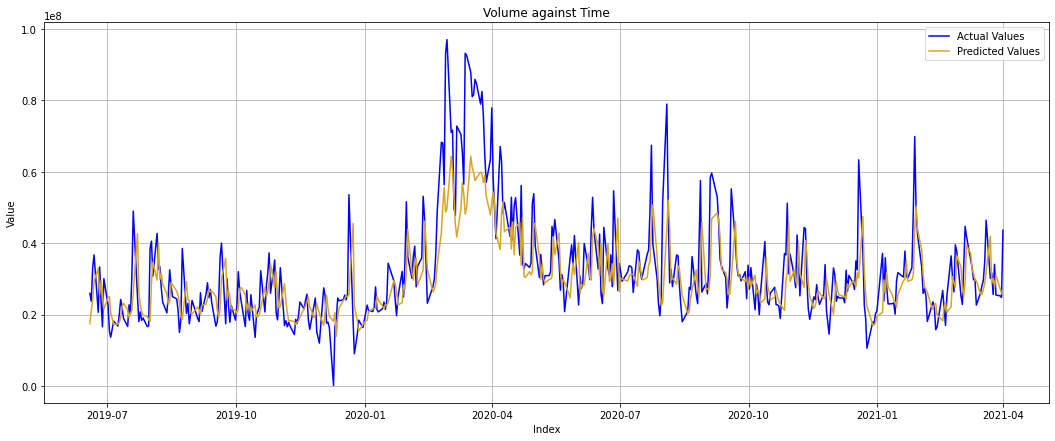

In [207]:
print(df_test['preds'])

# plot time plot for predictions and ground truth 
fig, ax = plt.subplots()
fig.set_size_inches(18, 7)
ax.set_title("Volume against Time")
ax.grid()
ax.set_xlabel("Index")
ax.set_ylabel("Value")
ax.plot(
    df_test['Volume'],
    color='blue', label='Actual Values');
ax.plot(
    df_test['preds'],
    color='goldenrod', label='Predicted Values')
ax.legend();

# Conclusion

Our model seems to be `accurate` since it's going along with the Actual Values even though the RMSE of the model is so high, yet we get good results